# Лабараторная работа №3

In [6]:
import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import yfinance as yf

# Задача 1: получение данных

In [7]:
def get_info(ticker_obj):
    info_keys = ['shortName','sector','indusrty','coutry','market']
    info_values = []
    for key in info_keys:
        info_values.append(ticker_obj.info.get(key, None))
    return dict(zip(info_keys, info_values))

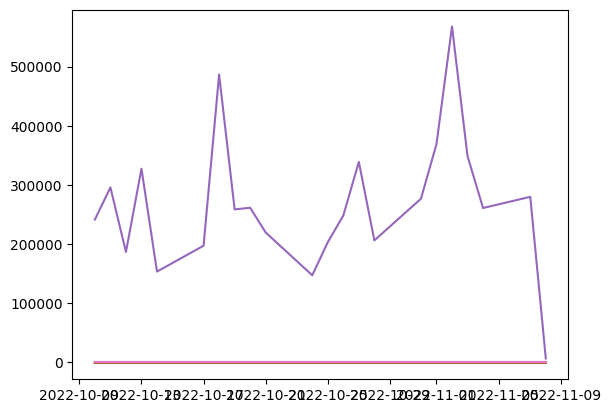

In [8]:
GAZP = yf.Ticker('GOLF')
GAZP.history()
plt.plot(GAZP.history())

In [9]:
all_tickers = pd.read_csv(
    'https://raw.githubusercontent.com/shilewenuw/get_all_tickers/master/get_all_tickers/tickers.csv', 
    header=None,
    error_bad_lines=False
)

all_tickers = all_tickers.values.reshape(-1)
print(len(all_tickers))
print(all_tickers[:4])

C:\Users\Кирилл\AppData\Local\Temp\ipykernel_11008\621757785.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  all_tickers = pd.read_csv(


2762
['DDD' 'MMM' 'WBAI' 'WUBA']


In [11]:
get_info(GAZP)

{'shortName': 'Acushnet Holdings Corp.',
 'sector': 'Consumer Cyclical',
 'indusrty': None,
 'coutry': None,
 'market': 'us_market'}

In [14]:
trending = pd.read_html("https://finance.yahoo.com/trending-tickers")[0]
#most_active = pd.read_html("https://finance.yahoo.com/most-active")[0]
gainers = pd.read_html("https://finance.yahoo.com/gainers")[0]
losers = pd.read_html("https://finance.yahoo.com/losers")[0]

In [15]:
interesting_tickers = set()

for df in [trending, gainers, losers]:
    interesting_tickers = interesting_tickers.union(set(df['Symbol']))
    
interesting_tickers = list(interesting_tickers)
interesting_tickers[:3]

['SQM', 'KSS', 'PLNT']

In [16]:
len(interesting_tickers)

69

In [17]:
full_ticker_data = []

for ticker in tqdm(interesting_tickers):
    try:
        ticker_obj = yf.Ticker(ticker)
        close_price = ticker_obj.history(period='3mo')['Close'].to_dict()
        info = get_info(ticker_obj)
        info.update(close_price)
        full_ticker_data.append(info)
    except:
        continue
        
full_ticker_df = pd.DataFrame(full_ticker_data)

100%|██████████| 69/69 [10:17<00:00,  8.94s/it]


In [18]:
full_ticker_df

,shortName,sector,indusrty,coutry,market,2022-08-08 00:00:00-04:00,2022-08-09 00:00:00-04:00,2022-08-10 00:00:00-04:00,2022-08-11 00:00:00-04:00,2022-08-12 00:00:00-04:00,...,2022-10-14 00:00:00-03:00,2022-10-17 00:00:00-03:00,2022-10-18 00:00:00-03:00,2022-10-19 00:00:00-03:00,2022-10-20 00:00:00-03:00,2022-10-21 00:00:00-03:00,2022-10-24 00:00:00-03:00,2022-10-25 00:00:00-03:00,2022-10-26 00:00:00-03:00,2022-10-27 00:00:00-03:00
0,Sociedad Quimica y Minera S.A.,Basic Materials,None,None,us_market,94.216454,95.559883,99.158699,99.805901,106.591675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kohl's Corporation,Consumer Cyclical,None,None,us_market,30.935141,29.184839,30.807310,32.075787,32.626446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Planet Fitness, Inc.",Consumer Cyclical,None,None,us_market,81.089996,76.449997,77.110001,74.709999,76.690002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Take-Two Interactive Software,",Communication Services,None,None,us_market,125.510002,120.760002,123.790001,120.669998,123.139999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LATAM AIRLINES GROUP SA SPONS A,Industrials,None,None,us_market,0.274460,0.274460,0.274460,0.285732,0.294476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Medtronic plc.,Healthcare,None,None,us_market,93.580002,93.099998,94.169998,94.040001,94.820000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,AMTD Digital Inc.,Technology,None,None,us_market,405.000000,212.000000,217.600006,214.000000,192.270004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,"Vertex Energy, Inc",Energy,None,None,us_market,13.980000,7.800000,7.930000,7.050000,7.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Fabrinet,Technology,None,None,us_market,96.169998,94.000000,97.540001,97.989998,100.660004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
full_ticker_df

,shortName,sector,indusrty,coutry,market,2022-08-08 00:00:00-04:00,2022-08-09 00:00:00-04:00,2022-08-10 00:00:00-04:00,2022-08-11 00:00:00-04:00,2022-08-12 00:00:00-04:00,...,2022-10-14 00:00:00-03:00,2022-10-17 00:00:00-03:00,2022-10-18 00:00:00-03:00,2022-10-19 00:00:00-03:00,2022-10-20 00:00:00-03:00,2022-10-21 00:00:00-03:00,2022-10-24 00:00:00-03:00,2022-10-25 00:00:00-03:00,2022-10-26 00:00:00-03:00,2022-10-27 00:00:00-03:00
0,Sociedad Quimica y Minera S.A.,Basic Materials,None,None,us_market,94.216454,95.559883,99.158699,99.805901,106.591675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kohl's Corporation,Consumer Cyclical,None,None,us_market,30.935141,29.184839,30.807310,32.075787,32.626446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Planet Fitness, Inc.",Consumer Cyclical,None,None,us_market,81.089996,76.449997,77.110001,74.709999,76.690002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Take-Two Interactive Software,",Communication Services,None,None,us_market,125.510002,120.760002,123.790001,120.669998,123.139999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LATAM AIRLINES GROUP SA SPONS A,Industrials,None,None,us_market,0.274460,0.274460,0.274460,0.285732,0.294476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Medtronic plc.,Healthcare,None,None,us_market,93.580002,93.099998,94.169998,94.040001,94.820000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,AMTD Digital Inc.,Technology,None,None,us_market,405.000000,212.000000,217.600006,214.000000,192.270004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,"Vertex Energy, Inc",Energy,None,None,us_market,13.980000,7.800000,7.930000,7.050000,7.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Fabrinet,Technology,None,None,us_market,96.169998,94.000000,97.540001,97.989998,100.660004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
scaler = StandardScaler()
tickers_scaled = scaler.fit_transform(full_ticker_df.iloc[:, 5:].T).T

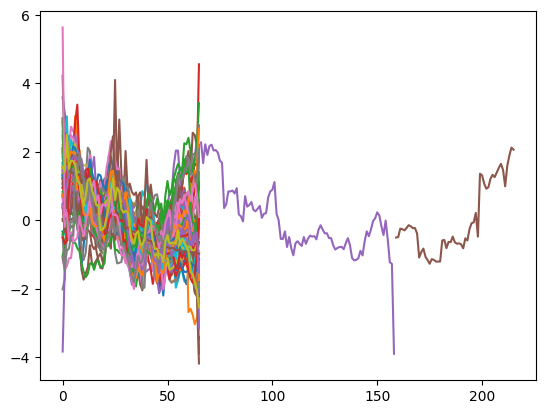

In [21]:
plt.plot(tickers_scaled.T);

# Задача 2: Обучение сети

# Basic KMeans

In [22]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

 11%|█         | 1/9 [00:01<00:11,  1.39s/it]


ValueError: Input X contains NaN.

# DTW

In [23]:
distortions = []
silhouette = []
K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", n_jobs=6, max_iter=10)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    if k > 1:
        silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_))

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(K[1:], silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]C:\Users\Кирилл\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tslearn\barycenters\dba.py:596: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_prev - cost) < tol:
  0%|          | 0/9 [00:03<?, ?it/s]


ValueError: One of the input time series contains only nans or has zero length.